# The Search Module


The `search` module of the `ah` package holds functions used to find and record the diagonals in the thresholded matrix, T. These functions prepare the found diagonals to later be transformed and assembled. 

- **find_complete_list**: Finds all smaller diagonals (and the associated pairs of repeats) that are contained pair_list, which is composed of larger diagonals found in find_initial_repeats. 

- **\_\_find_add_srows**: Finds pairs of repeated structures, represented as diagonals of a certain length, k, that start at the same time step as previously found pairs of repeated structures of the same length.

- **\_\_find_add_erows**: Finds pairs of repeated structures, represented as diagonals of a certain length, k, that end at the same time step as previously found pairs of repeated structures of the same length.

- **\_\_find_add_mrows** - Finds pairs of repeated structures, represented as diagonals of a certain length, k, that neither start nor end at the same time steps as previously found pairs of repeated structures of the same length.   

- **find_all_repeats**: Finds all the diagonals present in thresh_mat. This function is nearly identical to find_initial_repeats, with two crucial differences. First, we do not remove diagonals after we find them. Second, there is no smallest bandwidth size as we are looking for all diagonals.

- **find_complete_list_anno_only**: Finds annotations for all pairs of repeats found in find_all_repeats. This list contains all the pairs of repeated structures with their start/end indices and lengths.    

The following functions are imported from the [`utilities`](../ah/blob/master/aligned-hierarchies/utilities.py) module to reformat outputs and assist with the operations of the `search` functions.  

- stretch_diags
- add_annotations 
- \_\_find_song_pattern

For more in depth information on the function calls, an example function pipeline is shown below. Functions from the current module are shown in purple.

![alt text](pictures/function_pipeline.png)

### Importing necessary modules

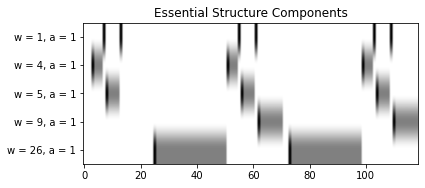

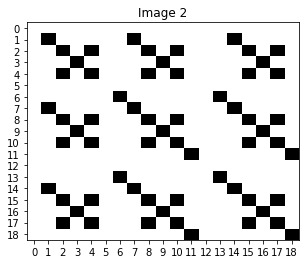

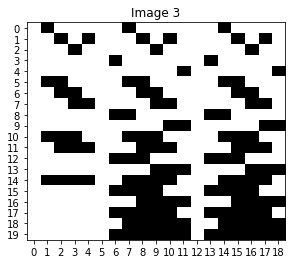

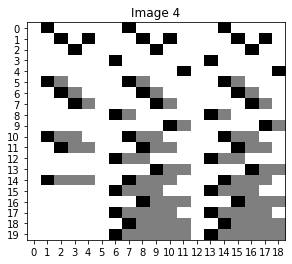

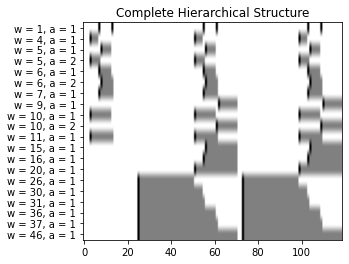

In [1]:
# numpy is used for mathematical calculations 
import numpy as np

# Set the path for the import
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\aligned-hierarchies")

# search module
from alignedHierarchies.search import *
from alignedHierarchies.search import __find_add_erows, __find_add_mrows, __find_add_srows

# utilities module 
from alignedHierarchies.utilities import *
from alignedHierarchies.utilities import __find_song_pattern


## find_complete_list

As seen in the flow chart, `find_intial_repeats` is called by `example` right before `find_complete_list`. In `find_complete_list`, smaller pairs of repeats are added to the original list of pairs of repeats made in `find_initial_repeats`. All of the pairs of repeats correspond to each repeated structure in another numpy array called _thresh\_mat_. This array holds all the repeated structures in a sequential data stream and the repeated structures are represented as diagonals.   

The inputs for the function are:

- __pair_list__ (np.ndarray):  pairs of repeats found in [`find_initial_repeats.py`](../ah/blob/master/vignettes/utilities_vignette.ipynb). 
   
- __song_length__ (int):  the number of audio shingles  

The output for the function is: 

- __lst_out__ (np.ndarray):  pairs of repeats with the added smaller repeats   

In [2]:
pair_list = np.array([[1, 10, 46, 55, 10], 
                      [31, 40, 46, 55, 10],
                      [10, 20, 40, 50, 11],
                      [1, 15, 31, 45, 15]])
song_length = 55

print("The input array is: \n", pair_list)
print("The number of audio shingles is: \n", song_length)

The input array is: 
 [[ 1 10 46 55 10]
 [31 40 46 55 10]
 [10 20 40 50 11]
 [ 1 15 31 45 15]]
The number of audio shingles is: 
 55


In [3]:
output = find_complete_list(pair_list, song_length)

print("The output array is: \n", output)

The output array is: 
 [[11 15 41 45  5  1]
 [ 1 10 31 40 10  1]
 [ 1 10 46 55 10  1]
 [31 40 46 55 10  1]
 [10 20 40 50 11  1]
 [ 1 15 31 45 15  1]]


In this example, there are two more added rows from __find_add_srows. When the array goes into __find_add_srows, the repeats are like this:
![alt text](pictures/find_all_repeats1.png)

Each row represents a pair of repeats, and each column represents a time step. The time steps with color black are the starting indices for repeats of length k that we use to check lst_no_anno for more repeats of length k.

![alt text](pictures/find_all_repeats2.png)

With the same starting indices and same length, we can find the same repeats in color yellow.  

![alt text](pictures/find_all_repeats3.png)
Then we find two more groups of repeats. 


## \_\_find_add_srows

`__find_add_srows` finds pairs of repeated structures, representated as diagonals of a certain length that start at the same time step as previously found pairs of repeated structures of the same length. 

The inputs for the function are: 

- __lst_no_anno__ (np.ndarray): pairs of repeats      
- __check_inds__ (np.ndarray): list of starting indices of repeats 
- __k__ (int): length of repeat that we are looking for

The out for the function is: 
- __add_rows__ (np.ndarray): newly found pairs of repeats of length _k_


In [4]:
lst_no_anno = np.array([[ 1, 10, 46, 55, 10],
                        [31, 40, 46, 55, 10],
                        [10, 20, 40, 50, 11],
                        [1, 15, 31, 45, 15]])
check_inds = np.array([ 1, 31, 46])
k = 10

print("The input array is: \n", lst_no_anno)
print("The indices of repeats to check: \n", check_inds)
print("The length of repeat we are searching for: \n", k)

The input array is: 
 [[ 1 10 46 55 10]
 [31 40 46 55 10]
 [10 20 40 50 11]
 [ 1 15 31 45 15]]
The indices of repeats to check: 
 [ 1 31 46]
The length of repeat we are searching for: 
 10


In [5]:
output = __find_add_srows(lst_no_anno, check_inds, k)

print("The output arrary is: \n", output)

The output arrary is: 
 [[ 1 10 31 40 10]
 [11 15 41 45  5]
 [ 1 10 31 40 10]
 [11 15 41 45  5]]


## \_\_find_add_erows

`__find_add_erows` finds pairs of repeated structures, representated as diagonals of a 
certain length that end at the same time step as previously found pairs of repeated structures of the same length.

The inputs for the functions are: 

- __lst_no_anno__ (np.ndarray): pairs of repeats
- __check_inds__ (np.ndarray): list of ending indices of repeats
- __k__ (int): length of repeats that we are looking for 

The output for the function is: 
- __add_rows__ (np.ndarray): newly found pairs of repeats of length _k_ 

**Example 1** 

In [6]:
lst_no_anno = np.array([[ 1, 10, 46, 55, 10],
                        [31, 40, 46, 55, 10],
                        [10, 20, 40, 50, 11],
                        [1, 15, 31, 45, 15]])
check_inds = np.array([10, 40, 55])
k = 10

print("The input array is: \n", lst_no_anno)
print("The indices of repeats to check: \n", check_inds)
print("The length of repeat we are searching for: \n", k)

The input array is: 
 [[ 1 10 46 55 10]
 [31 40 46 55 10]
 [10 20 40 50 11]
 [ 1 15 31 45 15]]
The indices of repeats to check: 
 [10 40 55]
The length of repeat we are searching for: 
 10


In [7]:
output = __find_add_erows(lst_no_anno, check_inds, k)

print("The output arrary is: \n", output)

The output arrary is: 
 []


**Example 2**

In [8]:
lst_no_anno = np.array([[ 1, 10, 31, 40, 10],
                        [31, 40, 46, 55, 10],
                        [11, 20, 36, 45, 10],
                        [1, 15, 31, 45, 15]])
check_inds = np.array([10, 20, 40, 45, 55])
k = 10

print("The input array is: \n", lst_no_anno)
print("The indices of repeats to check: \n", check_inds)
print("The length of repeat we are searching for: \n", k)

The input array is: 
 [[ 1 10 31 40 10]
 [31 40 46 55 10]
 [11 20 36 45 10]
 [ 1 15 31 45 15]]
The indices of repeats to check: 
 [10 20 40 45 55]
The length of repeat we are searching for: 
 10


In [9]:
output = __find_add_erows(lst_no_anno, check_inds, k)

print("The output arrary is: \n", output )

The output arrary is: 
 [[ 6 15 36 45 10]
 [ 1  5 31 35  5]]


## \_\_find_add_mrows

`__find_add_mrows` finds pairs of repeated structures, represented as diagonals of a certain
length that neither start nor end at the same time steps as previously
found pairs of repeated structures of the same length. 

The inputs for the functions are: 

- __lst_no_anno__ (np.ndarray): pairs of repeats
- __check_inds__ (np.ndarray): list of starting indices of repeats
- __k__ (int): length of repeats that we are looking for 

The output for the function is: 
- __add_rows__ (np.ndarray): newly found pairs of repeats of length _k_ 

**Example 1** 

In [10]:
lst_no_anno = np.array([[ 1, 10, 46, 55, 10],
                        [31, 40, 46, 55, 10],
                        [10, 20, 40, 50, 11],
                        [1, 15, 31, 45, 15]])
check_inds = np.array([ 1, 31, 46])
k = 10

print("The input array is: \n", lst_no_anno)
print("The indices of repeats to check: \n", check_inds)
print("The length of repeat we are searching for: \n", k)

The input array is: 
 [[ 1 10 46 55 10]
 [31 40 46 55 10]
 [10 20 40 50 11]
 [ 1 15 31 45 15]]
The indices of repeats to check: 
 [ 1 31 46]
The length of repeat we are searching for: 
 10


In [11]:
output = __find_add_mrows(lst_no_anno, check_inds, k)

print("The output arrary is: \n", output )

The output arrary is: 
 []


**Example 2** 

In [12]:
lst_no_anno = np.array([[ 1, 10, 46, 55, 10],
                        [31, 40, 46, 55, 10],
                        [10, 19, 40, 49, 10],
                        [2,  11, 47, 56, 10],
                        [1, 15, 31, 45, 15]])
check_inds = np.array([ 1, 2, 10, 31, 40, 46, 47])
k = 10

print("The input array is: \n", lst_no_anno)
print("The indices of repeats to check: \n", check_inds)
print("The length of repeat we are searching for: \n", k)

The input array is: 
 [[ 1 10 46 55 10]
 [31 40 46 55 10]
 [10 19 40 49 10]
 [ 2 11 47 56 10]
 [ 1 15 31 45 15]]
The indices of repeats to check: 
 [ 1  2 10 31 40 46 47]
The length of repeat we are searching for: 
 10


In [13]:
output = __find_add_mrows(lst_no_anno, check_inds, k)

print("The output arrary is: \n", output )

The output arrary is: 
 [[ 1  1 31 31  1]
 [ 2 11 32 41 10]
 [12 15 42 45  4]]


##  find_all_repeats 

`find_all_repeats` Finds all the diagonals present in _thresh_\__mat_. This function is nearly identical to `find_initial_repeats`, with two crucial differences. First, we do not remove diagonals after we find them. Second, there is no smallest bandwidth size as we are looking for all diagonals.

The inputs for the function are: 

- __thresh_mat__ (np.ndarray): thresholded matrix that we extract diagonals from
- __band_width_vec__ (np.ndarray): vector of lengths of diagonals to be found

The output for the function is:

- __all_lst__ (np.ndarray): pairs of repeats that correspond to diagonals in _thresh\_mat_

In [14]:
thresh_mat = np.array([[1, 0, 1, 0, 0],
                       [0, 1, 0, 1, 0],
                       [1, 0, 1, 0, 1],
                       [0, 1, 0, 1, 0],
                       [0, 0, 1, 0, 1]])

bandwidth_vec = np.array([1, 2, 3, 4, 5])

print("The threshold matrix is: \n", thresh_mat)
print("The lengths of the diagonals to be found are: \n", bandwidth_vec)

The threshold matrix is: 
 [[1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [0 0 1 0 1]]
The lengths of the diagonals to be found are: 
 [1 2 3 4 5]


In [15]:
output = find_all_repeats(thresh_mat, bandwidth_vec)

print("The output array is: \n", output )

The output array is: 
 [[1 1 3 3 1]
 [2 2 4 4 1]
 [3 3 5 5 1]
 [1 2 3 4 2]
 [2 3 4 5 2]]


## find_complete_list_anno_only

`find_complete_list_anno_only` finds annotations for all pairs of repeats found in `find_all_repeats.py`. This list contains all the pairs of repeated structures with their start/end indices and lengths.

The inputs for the function are: 

- __pair_list__ (np.ndarray): pairs of repeats 
- __song_length__ (int): number of audio shingles

The output for the function is: 

- __out_lst__ (np.ndarray): pairs of repeats with added smaller repeats and annotations 

In [16]:
pair_list = np.array([[3,3,5,5,1],
                      [2,2,8,8,1],
                      [3,3,9,9,1],
                      [2,2,15,15,1],
                      [8,8,15,15,1],
                      [4,4,17,17,1],
                      [2,3,8,9,2],
                      [3,4,9,10,2],
                      [2,3,15,16,2],
                      [8,9,15,16,2],
                      [3,4,16,17,2],
                      [2,4,8,10,3],
                      [3,5,9,11,3],
                      [7,9,14,16,3],
                      [2,4,15,17,3],
                      [3,5,16,18,3],
                      [9,11,16,18,3],
                      [7,10,14,17,4],
                      [7,11,14,18,5],
                      [8,12,15,19,5],
                      [7,12,14,19,6]])
song_length = 19


print("The pairs of repeats are: \n", pair_list)
print("The number of audio shingles in the song are:", song_length )

The pairs of repeats are: 
 [[ 3  3  5  5  1]
 [ 2  2  8  8  1]
 [ 3  3  9  9  1]
 [ 2  2 15 15  1]
 [ 8  8 15 15  1]
 [ 4  4 17 17  1]
 [ 2  3  8  9  2]
 [ 3  4  9 10  2]
 [ 2  3 15 16  2]
 [ 8  9 15 16  2]
 [ 3  4 16 17  2]
 [ 2  4  8 10  3]
 [ 3  5  9 11  3]
 [ 7  9 14 16  3]
 [ 2  4 15 17  3]
 [ 3  5 16 18  3]
 [ 9 11 16 18  3]
 [ 7 10 14 17  4]
 [ 7 11 14 18  5]
 [ 8 12 15 19  5]
 [ 7 12 14 19  6]]
The number of audio shingles in the song are: 19


In [17]:
output = find_complete_list_anno_only(pair_list, song_length)

print("The output array is: \n", output)

The output array is: 
 [[ 2  2  8  8  1  1]
 [ 2  2 15 15  1  1]
 [ 8  8 15 15  1  1]
 [ 3  3  5  5  1  2]
 [ 3  3  9  9  1  2]
 [ 4  4 17 17  1  3]
 [ 2  3  8  9  2  1]
 [ 2  3 15 16  2  1]
 [ 8  9 15 16  2  1]
 [ 3  4  9 10  2  2]
 [ 3  4 16 17  2  2]
 [ 2  4  8 10  3  1]
 [ 2  4 15 17  3  1]
 [ 3  5  9 11  3  2]
 [ 3  5 16 18  3  2]
 [ 9 11 16 18  3  2]
 [ 7  9 14 16  3  3]
 [ 7 10 14 17  4  1]
 [ 7 11 14 18  5  1]
 [ 8 12 15 19  5  2]
 [ 7 12 14 19  6  1]]
